# Movies Recommender System

### Here I am going to build a movie recommender system which suggests movies that are similar to a particular movie.

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np

In [2]:
column_names = ['user_id','item_id','rating','timestamp']
movies_data = pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
movies_data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


#### Notice that the above dataset doesn't contain movie titles. I am going to load another dataset containing movie titles and merge it with the above dataset

#### The timestamp denotes the time at which the particular rating was given. In this project, we are not going to deal with it.

In [4]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [5]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
movies_data = pd.merge(movies_data,movie_titles,on='item_id')

In [7]:
movies_data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### Let's do some Exploratory Data Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

#### I am now going to create a dataframe which contains average rating of movie and the number of ratings given to that movie.

In [9]:
#Average rating of movies
movies_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

#### There might be many movies which have been given only a single rating of 5 and shown as highest rated movie. It makes sense to consider number of ratings for each movie.

In [10]:
#Count of number of ratings
movies_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [11]:
ratings = pd.DataFrame(movies_data.groupby('title')['rating'].mean())

In [12]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
ratings['Number_Of_Ratings'] = pd.DataFrame(movies_data.groupby('title')['rating'].count())
ratings.head()

,rating,Number_Of_Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


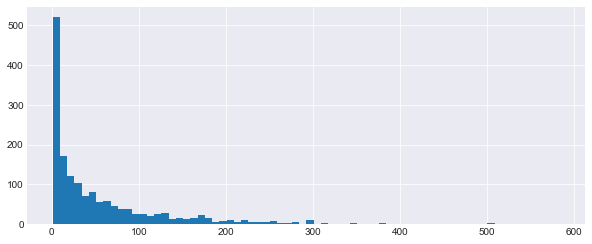

In [14]:
#Histogram of number of ratings
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid')
#sns.distplot(ratings['Number_Of_Ratings'],bins=70)
ratings['Number_Of_Ratings'].hist(bins=70)

#### We can see that there are hardly any movies with count of ratings more than 200. More than 500 movies have less than 10 ratings.

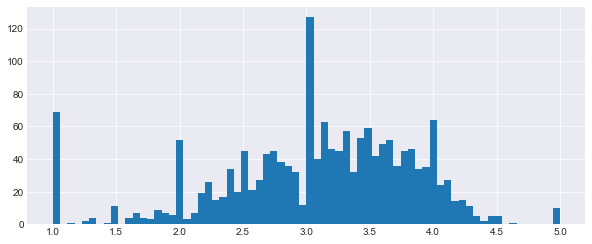

In [15]:
#Histogram of movie ratings
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

#### The peaks at integer valued ratings may be because of less number of audience giving only that particular rating (Example: rating = 1.0) and so the average rating for that movie remained the same. 

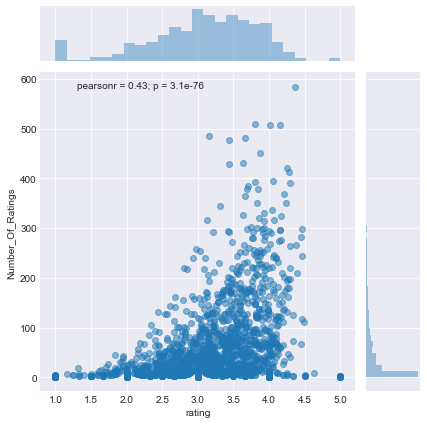

In [16]:
sns.jointplot(x='rating',y='Number_Of_Ratings',data=ratings, alpha=0.5)

#### See the pattern how the number of ratings increase as the rating value increases. This could be because of the fact that good movies are watched and rated by many.

### Now let's move on to the acutal recommendation

#### Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [17]:
moviematrix = movies_data.pivot_table(values='rating',index='user_id',columns='title')

In [18]:
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Most rated movies
ratings['Number_Of_Ratings'].sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: Number_Of_Ratings, dtype: int64

#### Let's try to recommend movies which are similar to 1. Toy Story and 2. Independence Day

In [20]:
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
toystoryRatings = moviematrix['Toy Story (1995)']
independencedayRatings = moviematrix['Independence Day (ID4) (1996)']

In [25]:
toystoryRatings.head()

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
Name: Toy Story (1995), dtype: float64

In [23]:
similar_to_toystory = moviematrix.corrwith(toystoryRatings)
similar_to_independenceday = moviematrix.corrwith(independencedayRatings)

C:\Users\ramin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ramin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [24]:
similar_to_toystory.head()

title
'Til There Was You (1997)    0.534522
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.232118
12 Angry Men (1957)          0.334943
187 (1997)                   0.651857
dtype: float64

In [26]:
corr_toystory = pd.DataFrame(data=similar_to_toystory,columns=['Correlation'])

In [27]:
corr_toystory.head(10)

,Correlation
title,
'Til There Was You (1997),0.534522
1-900 (1994),NaN
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857
2 Days in the Valley (1996),0.162728
"20,000 Leagues Under the Sea (1954)",0.328472
2001: A Space Odyssey (1968),-0.069060
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [28]:
#Dropping NAN values
corr_toystory.dropna(inplace=True)

In [29]:
corr_toystory.head(10)

,Correlation
title,
'Til There Was You (1997),0.534522
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857
2 Days in the Valley (1996),0.162728
"20,000 Leagues Under the Sea (1954)",0.328472
2001: A Space Odyssey (1968),-0.069060
"39 Steps, The (1935)",0.150055
8 1/2 (1963),-0.117259


In [30]:
corr_toystory.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
Reckless (1995),1.0
Ladybird Ladybird (1994),1.0
Infinity (1996),1.0
Albino Alligator (1996),1.0
Toy Story (1995),1.0
Guantanamera (1994),1.0
Late Bloomers (1996),1.0
Across the Sea of Time (1995),1.0


### Note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched Toy Story

### Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier)

In [34]:
corr_toystory = corr_toystory.join(ratings['Number_Of_Ratings'])
corr_toystory.head(10)

,Correlation,Number_Of_Ratings
title,,
'Til There Was You (1997),0.534522,9
101 Dalmatians (1996),0.232118,109
12 Angry Men (1957),0.334943,125
187 (1997),0.651857,41
2 Days in the Valley (1996),0.162728,93
"20,000 Leagues Under the Sea (1954)",0.328472,72
2001: A Space Odyssey (1968),-0.069060,259
"39 Steps, The (1935)",0.150055,59
8 1/2 (1963),-0.117259,38


In [37]:
corr_toystory[corr_toystory['Number_Of_Ratings']>=100].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,Number_Of_Ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
Amistad (1997),0.449915,124
Beauty and the Beast (1991),0.442960,202
"Mask, The (1994)",0.432855,129
Cinderella (1950),0.428372,129


### These movies can be recommended for the people who watched Toy Story

### Let's now try for Independence Day

In [38]:
corr_independenceday = pd.DataFrame(data=similar_to_independenceday,columns=['Correlation'])
corr_independenceday.dropna(inplace=True)
corr_independenceday = corr_independenceday.join(ratings['Number_Of_Ratings'])
corr_independenceday[corr_independenceday['Number_Of_Ratings']>=100].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,Number_Of_Ratings
title,,
Independence Day (ID4) (1996),1.000000,429
"Craft, The (1996)",0.578351,104
Twister (1996),0.560029,293
Down Periscope (1996),0.531194,101
"Ghost and the Darkness, The (1996)",0.516122,128
"Rainmaker, The (1997)",0.513094,145
"Hunt for Red October, The (1990)",0.510266,227
Dragonheart (1996),0.505386,158
Top Gun (1986),0.504166,220


### These movies can be suggested to people who watched Independence Day.